In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("/home/rohandoshi21/Development/College/PICT-BE-SEM8/Datasets/fashion-mnist_train.csv")

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train = df_train.drop('label', axis=1)
x_train = np.array(x_train).reshape(x_train.shape[0], 28,28)

In [5]:
y_train = df_train['label']
y_train = np.array(y_train)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy

model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

2024-04-27 11:32:31.729158: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-27 11:32:31.832018: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-27 11:32:31.832034: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-27 11:32:31.850152: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-27 11:32:32.290758: W tensorflow/stream_executor/platform/de

In [7]:
model.fit(x_train, y_train, epochs=2)

Epoch 1/5


2024-04-27 11:32:33.695854: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 376320000 exceeds 10% of free system memory.


1875/1875 [==============================] - 40s 21ms/step - loss: 1.1888 - accuracy: 0.8473
Epoch 2/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3024 - accuracy: 0.8902
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2766 - accuracy: 0.8988
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2596 - accuracy: 0.9043
Epoch 5/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2376 - accuracy: 0.9125


In [8]:
df_test = pd.read_csv("/home/rohandoshi21/Development/College/PICT-BE-SEM8/Datasets/fashion-mnist_test.csv")
x_test = df_test.drop('label', axis=1)
x_test = np.array(x_test).reshape(x_test.shape[0], 28,28)
y_test = np.array(df_test['label'])

In [9]:
metrics = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2942 - accuracy: 0.9033


In [10]:
metrics

[0.2941840589046478, 0.9032999873161316]

1/1 [==============================] - 0s 20ms/step
Correct Label Predicted


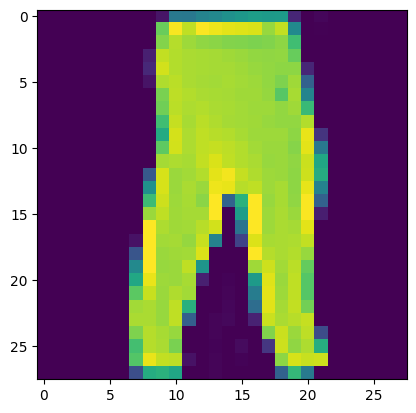

In [37]:
# Predicted Label
image_index = 1352
prediction = model.predict(x_test[image_index:image_index+1])
if np.argmax(prediction) == y_test[image_index]:
    print("Correct Label Predicted")
else:
    print("Incorrect Label Predicted")
plt.imshow(x_test[image_index:image_index+1][0])